**Image** **Segmentation**

In [3]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 18.6 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
import cv2 # cv2 used to read, display, and manipulate images and videos in Python.
import numpy as np
from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load a YOLOv8 model (pre-trained)
model = YOLO("yolov8m-seg.pt")

100%|██████████| 52.4M/52.4M [00:00<00:00, 226MB/s]


In [ ]:
# Run prediction on the image and save both results (image and text)
predict = model.predict("/content/drive/MyDrive/Data/download.jpg" , save = True , save_txt = True)


image 1/1 /content/drive/MyDrive/Data/download.jpg: 480x640 1 bicycle, 1 truck, 1 dog, 5698.1ms
Speed: 15.9ms preprocess, 5698.1ms inference, 49.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict
1 label saved to runs/segment/predict/labels


In [ ]:
predict[0].masks.data[0].unique()

tensor([0., 1.])

In [ ]:
H , W , _ = cv2.imread("/content/drive/MyDrive/Data/download.jpg").shape
print(f"Height: {H}, \nWidth: {W} , \nNo. of Channels: {_}")

Height: 148, 
Width: 198 , 
No. of Channels: 3


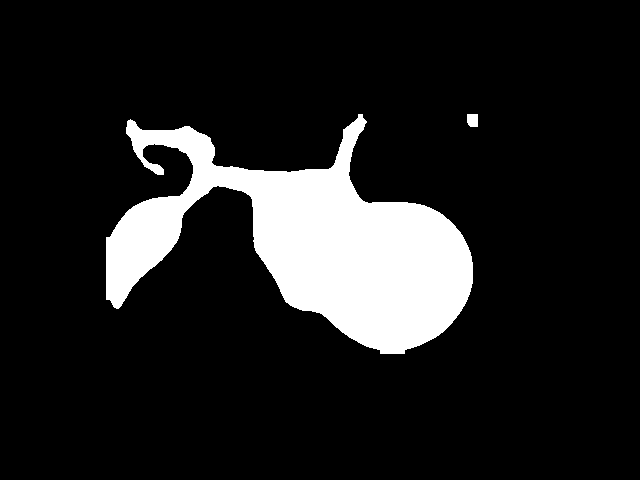

In [ ]:
# cv2_imshow((predict[0].masks.masks[0].numpy() * 255).astype("uint8"))

# Assuming predict[0].masks.data contains the mask data for the first detected object
# We convert the mask to a NumPy array, multiply by 255 to scale to [0, 255] for visualization,
# and convert to uint8 (which is the format required by OpenCV for displaying images).

# Display the first mask
mask_0 = (predict[0].masks.data[0].numpy() * 255).astype("uint8")
cv2_imshow(mask_0)




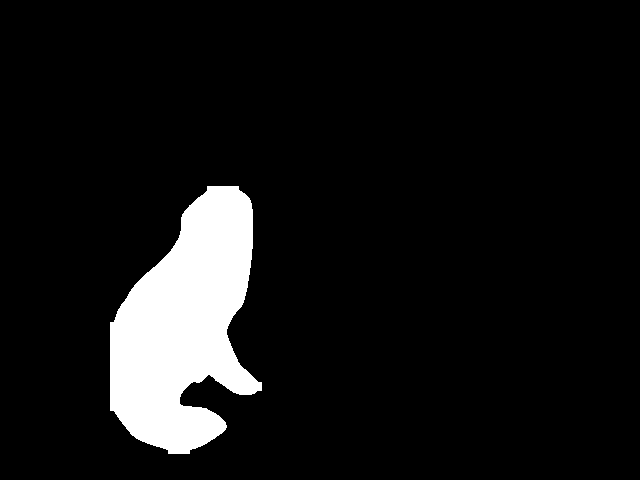

In [ ]:
# Display the second mask
mask_1 = (predict[0].masks.data[1].numpy() * 255).astype("uint8")
cv2_imshow(mask_1)

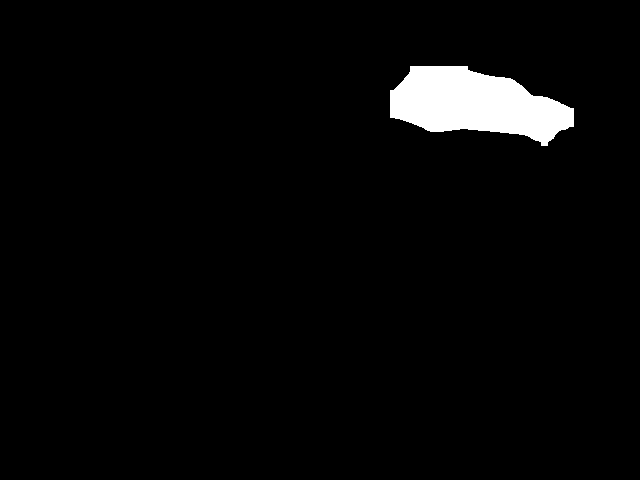

In [ ]:
# Display the third mask
mask_2 = (predict[0].masks.data[2].numpy() * 255).astype("uint8")
cv2_imshow(mask_2)

In [ ]:
# For polygon segmentation of the third object (use 'xy' to get polygon points in pixel coordinates)
# 'xy' contains the polygon points for the detected object in pixel coordinates

# Get the pixel coordinates for the polygon of the third mask (object)
polygon_coords = predict[0].masks.xy[0]  # xy contains a list of arrays with (x, y) coordinates

In [ ]:
print(polygon_coords)

[[     145.41      38.731]
 [     147.57      38.731]
 [     147.57      35.019]
 ...
 [     133.34        64.1]
 [     133.03        64.1]
 [     132.72      63.791]]


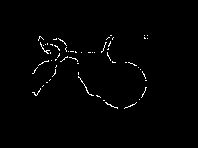

In [ ]:
# Create a blank mask (black image) of the same size as the original image
blk = np.zeros((H, W))

# Draw the polygon by setting pixels inside the region to 255 (white)
for coord in polygon_coords:
    x, y = coord.astype("int")  # Convert coordinates to integers for pixel indexing
    blk[y, x] = 255

# Display the segmented region as a binary mask (polygon)
cv2_imshow(blk.astype("uint8"))


image 1/1 /content/drive/MyDrive/Data/download.jpg: 480x640 1 bicycle, 1 truck, 1 dog, 1670.9ms
Speed: 3.3ms preprocess, 1670.9ms inference, 20.8ms postprocess per image at shape (1, 3, 480, 640)


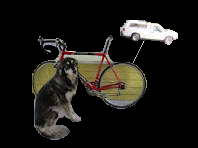

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the original image
image_path = "/content/drive/MyDrive/Data/download.jpg"
image = cv2.imread(image_path)

from ultralytics import YOLO  # Example with YOLOv8

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8m-seg.pt')  # Replace with the correct model path if needed

# Perform inference on the image
predict = model(image_path)


# Get the height and width of the original image
H, W, _ = image.shape


# Create a black mask the same size as the image
mask = np.zeros((H, W), dtype=np.uint8)

# Loop through the polygons and draw them on the mask
for i in range(3):  # Assuming you want to display the first 3 detected objects
    polygon_coords = predict[0].masks.xy[i]  # Get the polygon coordinates for object i

    # Convert the coordinates to integers for OpenCV
    polygon_coords = polygon_coords.astype(int)

    # Fill the polygon on the mask (white color inside the polygon)
    cv2.fillPoly(mask, [polygon_coords], color=255)

# Create a blacked-out version of the original image
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Display the masked image using cv2_imshow in Colab
cv2_imshow(masked_image)


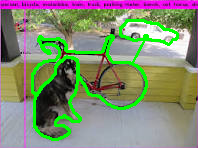

In [ ]:
# Load the original image
image_path = "/content/drive/MyDrive/Data/download.jpg"
image = cv2.imread(image_path)

# Get the height and width of the original image
H, W, _ = image.shape

# Loop through the polygons and draw them on the image
for i in range(3):  # Assuming you want to display the first 3 detected objects
    polygon_coords = predict[0].masks.xy[i]  # Get the polygon coordinates for object i

    # Convert the coordinates to integers for OpenCV
    polygon_coords = polygon_coords.astype(int)

    # Draw the polygon on the image (in-place) with a specific color (e.g., green)
    cv2.polylines(image, [polygon_coords], isClosed=True, color=(0, 255, 0), thickness=2)

# Display the image with polygons using cv2_imshow in Colab
cv2_imshow(image)

In [ ]:
outs = open("/content/runs/segment/predict/labels/doggo.txt" , "r").readlines()

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/segment/predict/labels/doggo.txt'

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [1]:
for dt in outs:
  print(int(dt.split()[0]) , coco_names[int(dt.split()[0])])

NameError: name 'outs' is not defined

**Remove Image Background**

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the original image
image_path = "/content/drive/MyDrive/Data/download.jpg"
image = cv2.imread(image_path)

from ultralytics import YOLO  # Example with YOLOv8

# Load a pre-trained YOLOv8 model
model = YOLO("yolov8m-seg.pt")

# Perform inference on the image
predict = model(image_path)


# Get the height and width of the original image
H, W, _ = image.shape

# Assuming `predict` contains segmentation results and you want to keep the first mask
mask = predict[0].masks.data[0].numpy()  # Get the mask for the first detected object

# Ensure the mask is binary and in uint8 format
mask = (mask * 255).astype(np.uint8)

# Resize mask to the same dimensions as the original image if necessary
if mask.shape != (H, W):
    mask = cv2.resize(mask, (W, H))

# Create a new background (for example, a solid color background)
new_background = np.full(image.shape, (255, 0, 0), dtype=np.uint8)  # Red background

# Create the foreground (original image)
foreground = cv2.bitwise_and(image, image, mask=mask)

# Create the inverse of the mask
inverse_mask = cv2.bitwise_not(mask)

# Create the background using the inverse mask
background = cv2.bitwise_and(new_background, new_background, mask=inverse_mask)

# Combine the foreground and background
combined_image = cv2.add(foreground, background)

# Resize the combined image for display (optional)
output_size = (1200, 800)  # Set the desired output size (width, height)
resized_image = cv2.resize(combined_image, output_size)

# Display the final image with the new background
cv2_imshow(resized_image)


ModuleNotFoundError: No module named 'ultralytics'

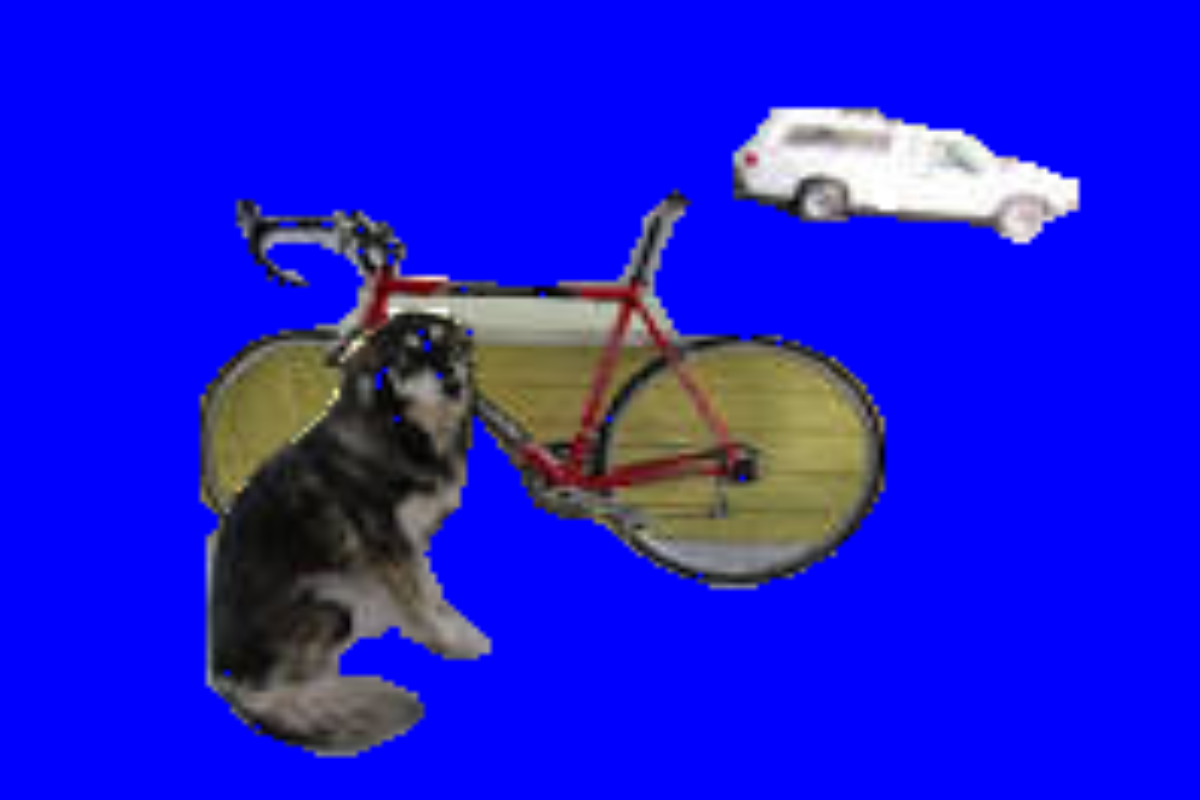

In [ ]:
# Assuming `predict` contains segmentation results
num_masks = len(predict[0].masks.data)  # Get the number of detected masks

# Create a blank foreground
foreground = np.zeros_like(image)

# Create a new background (e.g., a solid color or another image)
new_background = np.full(image.shape, (255, 0, 0), dtype=np.uint8)  # Red background

# Loop through each detected mask
for i in range(num_masks):
    # Get the mask for the current object
    mask = predict[0].masks.data[i].numpy()  # Get the mask for the i-th detected object
    mask = (mask * 255).astype(np.uint8)  # Ensure the mask is binary and in uint8 format

    # Resize mask to the same dimensions as the original image if necessary
    if mask.shape != (H, W):
        mask = cv2.resize(mask, (W, H))

    # Create the current foreground object
    current_foreground = cv2.bitwise_and(image, image, mask=mask)

    # Add the current object to the overall foreground
    foreground = cv2.add(foreground, current_foreground)

# Ensure the mask is applied correctly to create transparency
# Create a mask for the foreground
foreground_mask = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)
foreground_mask = cv2.threshold(foreground_mask, 1, 255, cv2.THRESH_BINARY)[1]  # Create binary mask

# Create the inverse mask for the new background
inverse_mask = cv2.bitwise_not(foreground_mask)

# Create the background using the inverse mask
background = cv2.bitwise_and(new_background, new_background, mask=inverse_mask)

# Combine the foreground and background
combined_image = cv2.add(foreground, background)

# Resize the combined image for display (optional)
output_size = (1200, 800)  # Set the desired output size (width, height)
resized_image = cv2.resize(combined_image, output_size)

# Display the final image with the new background
cv2_imshow(resized_image)


**Increase or Decrease the Image Broghtness**

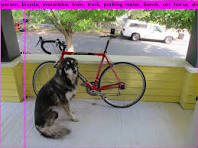

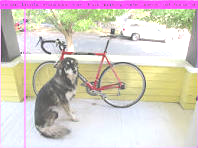

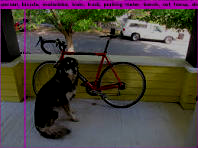

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the original image
image_path = "/content/drive/MyDrive/Data/download.jpg"
image = cv2.imread(image_path)

# Function to adjust brightness
def adjust_brightness(image, value):
    # Convert image to float32 to avoid overflow and underflow issues
    image = image.astype(np.float32)
    # Add the brightness value to each pixel
    bright_image = cv2.add(image, value)
    # Clip the values to stay in the valid range [0, 255]
    bright_image = np.clip(bright_image, 0, 255)
    # Convert back to uint8
    return bright_image.astype(np.uint8)

# Increase brightness
brightness_increase = 80  # Change this value to increase brightness
bright_image = adjust_brightness(image, brightness_increase)

# Decrease brightness
brightness_decrease = -70  # Change this value to decrease brightness
dark_image = adjust_brightness(image, brightness_decrease)

# Display the original and adjusted images
cv2_imshow(image)               # Original Image
print("\n")
cv2_imshow(bright_image)        # Brightened Image
print("\n")
cv2_imshow(dark_image)          # Darkened Image
